/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import trange  # type: ignore


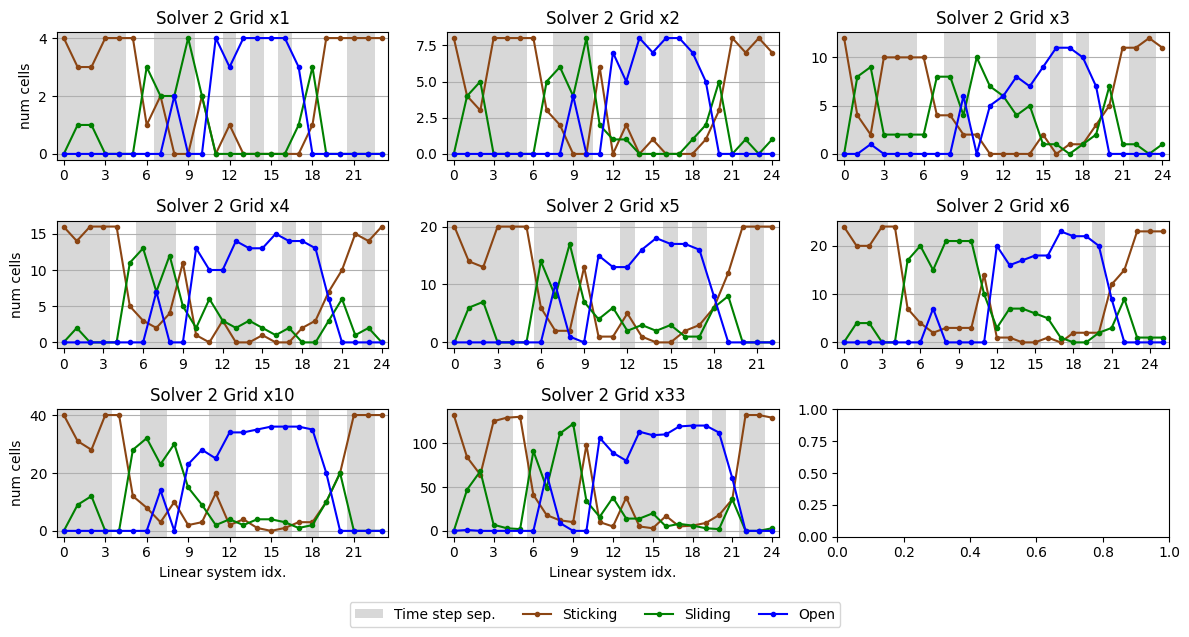

In [1]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
from thm_models import make_model
import porepy as pp

solvers = [2]
ph = 1
bb = 2
fr = 1
grid_refinement = [1, 2, 3, 4, 5, 6, 10, 33]

data = {}
names = {}
for i, [g, sol] in enumerate(product(grid_refinement, solvers)):
    data[i] = load_data(f"../../stats/stats_thermal_geo1x{g}_sol{sol}_bb{bb}_fr{fr}.json")
    names[i] = f"Solver {sol} Grid x{g}"


shape = [3, 3]
figsize = (12, 6)

def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

In [2]:
from collections import defaultdict
import pandas as pd

table = defaultdict(lambda: [])

NDIGITS = 2

grid_refinement = [1, 2, 3, 4, 5, 6, 10, 33]

for g in grid_refinement:
    stats_name = f"stats_thermal_geo1x{g}_sol{sol}_bb{bb}_fr{fr}.json"
    entry = load_data(f"../../stats/{stats_name}")
    dofs_info = load_data(f"../../stats/dofs_info_{stats_name}")
    total_dofs = (
        dofs_info["block 0"]
        + dofs_info["block 1"]
        + dofs_info["block 2"]
        + dofs_info["block 3"]
        + dofs_info["block 4"]
        + dofs_info["block 5"]
        + dofs_info["block 6"]
        + dofs_info["block 7"]
        + dofs_info["block 8"]

    )
    table['tmp'] = '-'
    table["Total DoFs"].append(int(total_dofs))
    table["GMRES iters."].append(int(np.mean(get_gmres_iterations(entry))))
    table['Newton iters.'].append(round(np.mean(get_newton_iterations(entry)), NDIGITS))

    converged_reason = get_petsc_converged_reason(entry)
    # table['\# lim iters.'].append(sum(np.array(get_petsc_converged_reason(entry)) < 0))

table = pd.DataFrame(table).T[1:]
table.rename(columns=table.iloc[0], inplace=True)
table = table[1:]
table.columns.name = 'Total DoFs'
table

Total DoFs,1032,3968,8736,15072,23600,34272,93680,1009616
GMRES iters.,8,11,13,14,15,16,17,26
Newton iters.,2.0,2.08,2.08,2.08,1.92,2.17,2.0,2.08


In [3]:
dofs_info

{'block 0': 251942,
 'block 1': 503884,
 'block 2': 132,
 'block 3': 264,
 'block 4': 264,
 'block 5': 528,
 'block 6': 251942,
 'block 7': 132,
 'block 8': 528,
 'cell_volumes': [0.003030303030293835,
  0.0030303030302938905,
  0.003030303030303605,
  0.003030303030304382,
  0.0030303030302951117,
  0.0030303030302937795,
  0.0030303030302938905,
  0.003030303030301995,
  0.0030303030303044376,
  0.003030303030296777,
  0.003030303030293835,
  0.003030303030300663,
  0.003030303030310988,
  0.003030303030308601,
  0.0030303030302984424,
  0.0030303030302938905,
  0.0030303030302937795,
  0.003030303030293835,
  0.0030303030302938905,
  0.0030303030302937795,
  0.0030303030302937795,
  0.003030303030293946,
  0.0030303030302937795,
  0.0030303030302937795,
  0.003030303030293946,
  0.0030303030302937795,
  0.0030303030302937795,
  0.0030303030302938905,
  0.003030303030293835,
  0.0030303030302937795,
  0.0030303030302938905,
  0.003030303030293835,
  0.0030303030302938905,
  0.0030303